In [40]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
from matplotlib.pyplot import rcParams

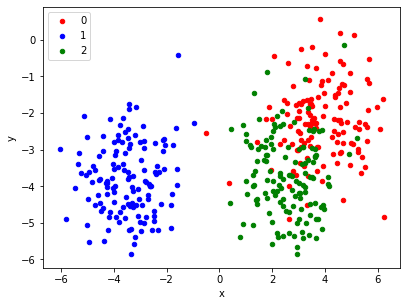

In [41]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=400, centers=3, n_features=2,center_box=(-4.0,4.0))
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
rcParams['figure.figsize']=6.4,4.8
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [42]:
df.sample(5)

,x,y,label
334,2.079621,-2.286475,2
217,-4.692946,-4.517283,1
320,2.056991,-0.436876,0
298,3.898956,-1.126447,0
358,-2.063207,-2.878358,1


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values
sc=StandardScaler()
X=sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Classification")
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Classification
(320, 2) (80, 2) (320,) (80,)


In [45]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)    
y_pred=clf.predict(X_test)

In [46]:
print(accuracy_score(y_test,y_pred))

0.8375


In [47]:
def VT(max_depth):
    X=df.iloc[:,0:2].values
    y=df.iloc[:,-1].values
    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    clf=DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X,y)
    a=np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.01)
    b=np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=0.01)
    XX,YY=np.meshgrid(a,b)
    arr=np.array([XX.ravel(),YY.ravel()]).T
    labels=clf.predict(arr)
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.50)
    plt.scatter(X[:,0],X[:,1],c=y)

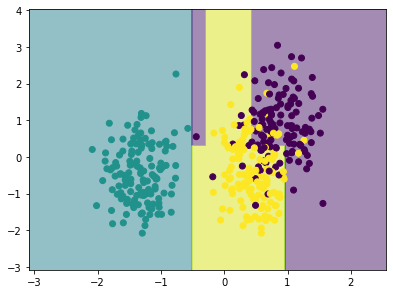

In [49]:
VT(max_depth=4)

In [50]:
def DT(X,y,k=25):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)

    training_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test,y_pred)

    return training_score, test_score

Maximum overfitting: 0.24687499999999996 at depth: 14
Maximum underfitting: 0.012499999999999956 at depth: 3


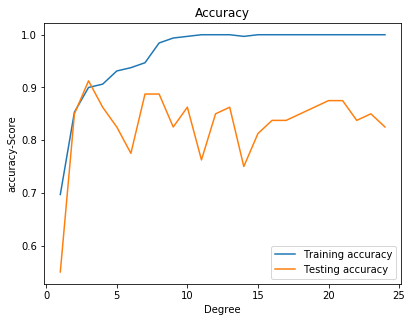

In [51]:
train=[]
test=[]
error1=0
error2=0
x1=0
x2=0
depth1=0
depth2=0
for i in range(1,25):
    r2train,r2test=DT(X,y,k=i)
    if(r2train>r2test):
        x1=r2train-r2test
    else:
        x2=r2test-r2train
    if(error1<x1):
        error1=x1
        depth1=i
    if(error2<x2):
        error2=x2
        depth2=i
    train.append(r2train)
    test.append(r2test)
print("Maximum overfitting:",error1,"at depth:",depth1)
if(error2==0 & depth2==0):
    print("No underfitting")
else:
    print("Maximum underfitting:",error2,"at depth:",depth2)
x=np.arange(24)+1
plt.plot(x,train,label="Training accuracy")
plt.plot(x,test,label="Testing accuracy")
rcParams['figure.figsize']=6.4,4.8
plt.legend()
plt.xlabel("Degree")
plt.ylabel("accuracy-Score")
# plt.xlim((1, 15))
# plt.ylim((-3, 2))
plt.title("Accuracy");
plt.show()

generating the user input tree..
Enter the max_depth:3
Enter the criterion(gini/entropy):gini


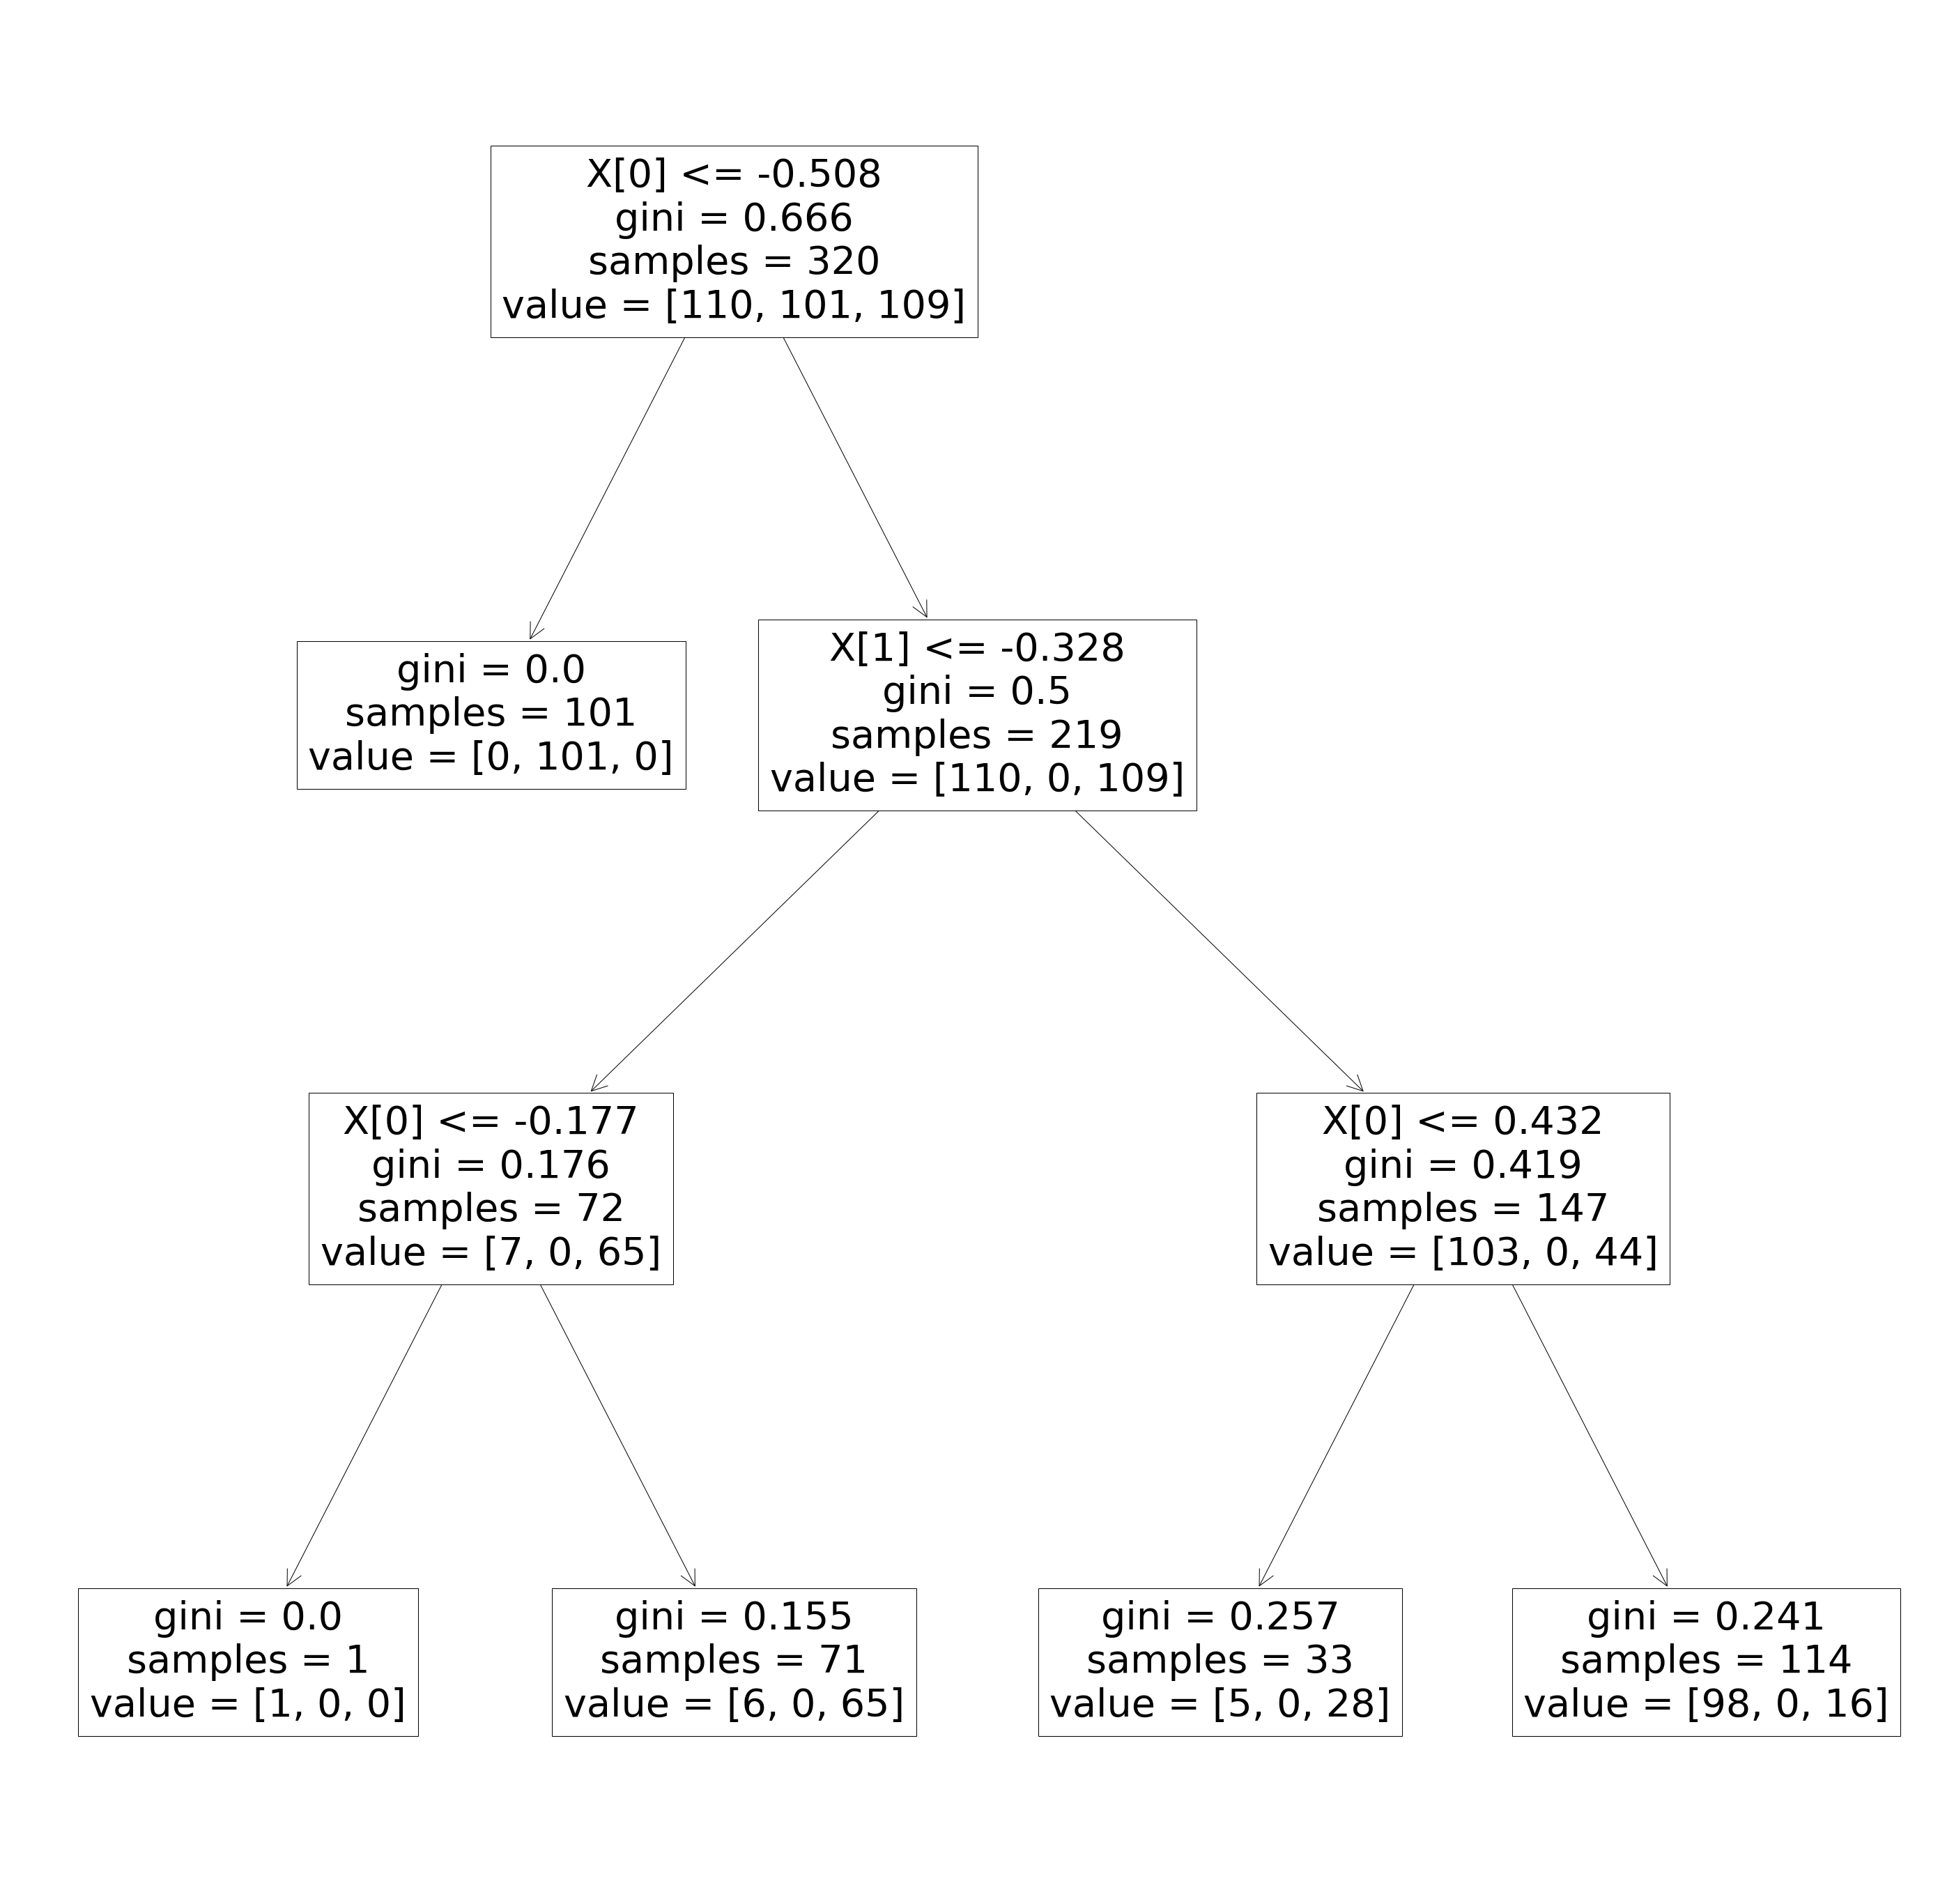

In [52]:
print("generating the user input tree..")
n=int(input("Enter the max_depth:"))
string=input("Enter the criterion(gini/entropy):")
clf=DecisionTreeClassifier(criterion=string,max_depth=n)
clf.fit(X_train,y_train)
rcParams['figure.figsize']=50,50
plot_tree(clf)
plt.show()

In [53]:
param_dist={"criterion":["gini","entropy"],"max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,None]}

In [54]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [55]:
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
   

In [56]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
grid.best_score_

0.8875

In [58]:
best_criteria,best_depth=grid.best_params_.values()

The best split..may take some time..


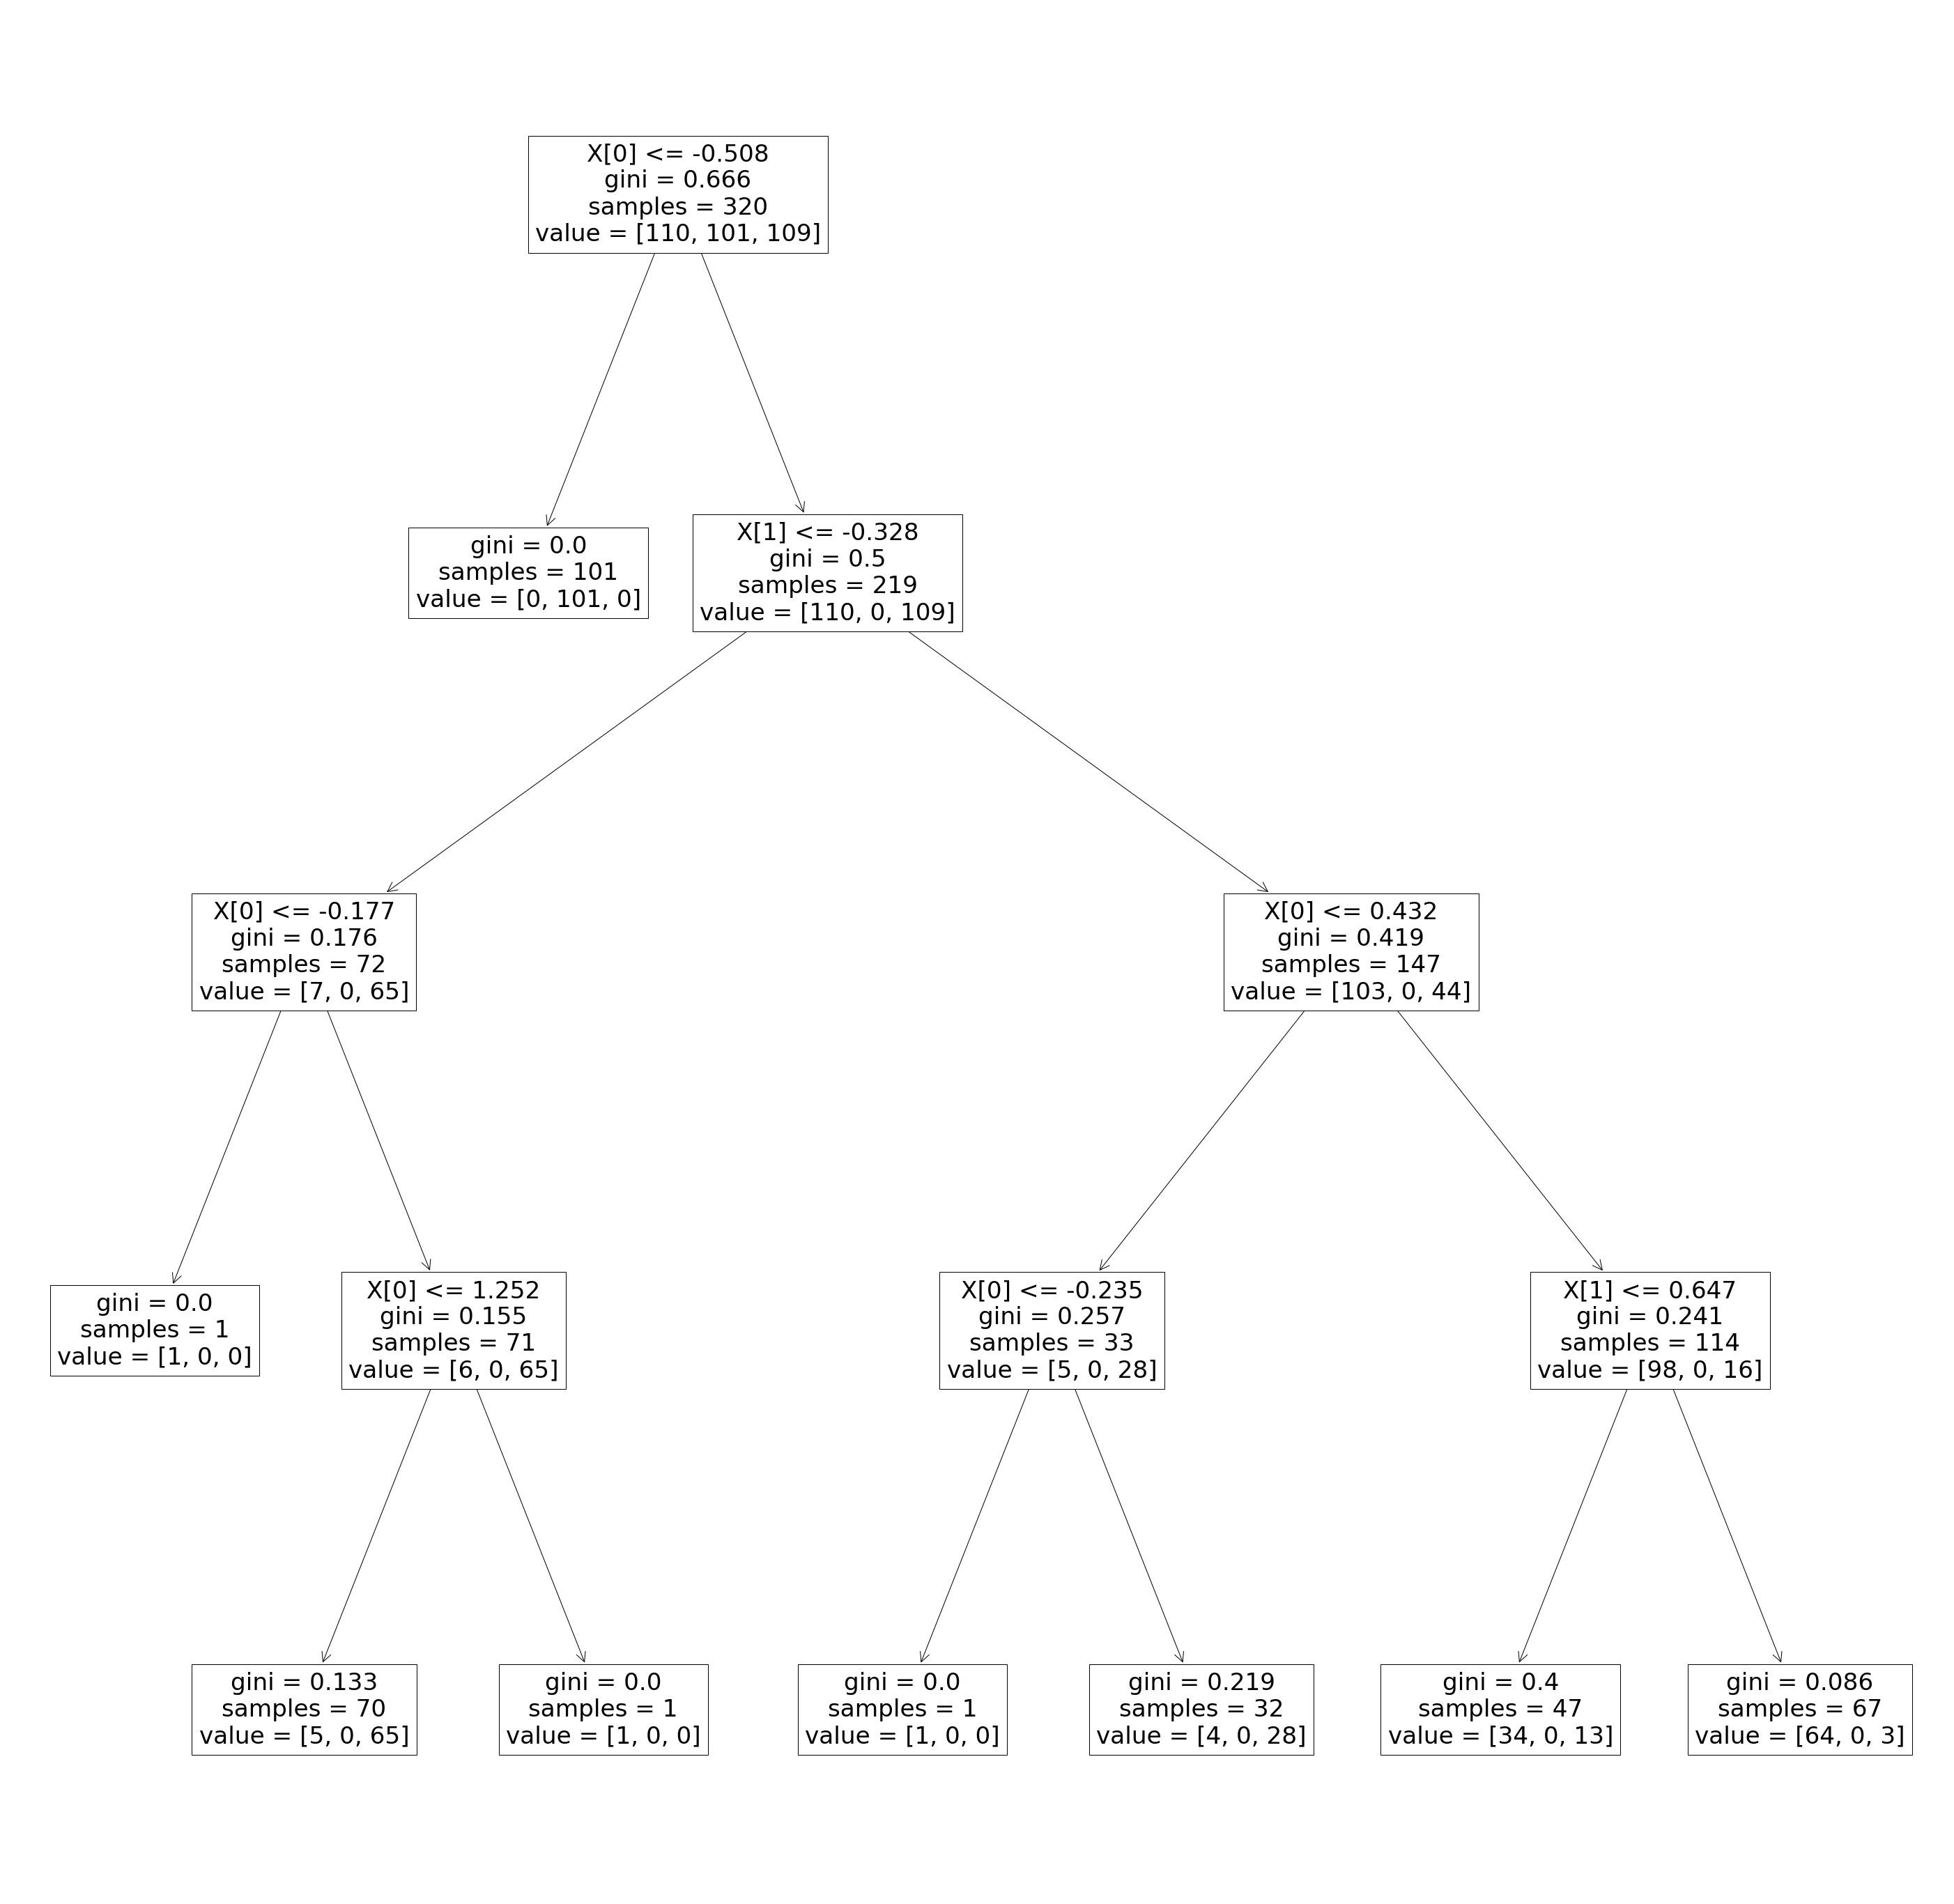

In [59]:
clf=DecisionTreeClassifier(criterion=best_criteria,max_depth=best_depth)
clf.fit(X_train,y_train)
rcParams['figure.figsize']=50,50
print("The best split..may take some time..")
plot_tree(clf)
plt.show()

Split during Overfitting..may take some time..


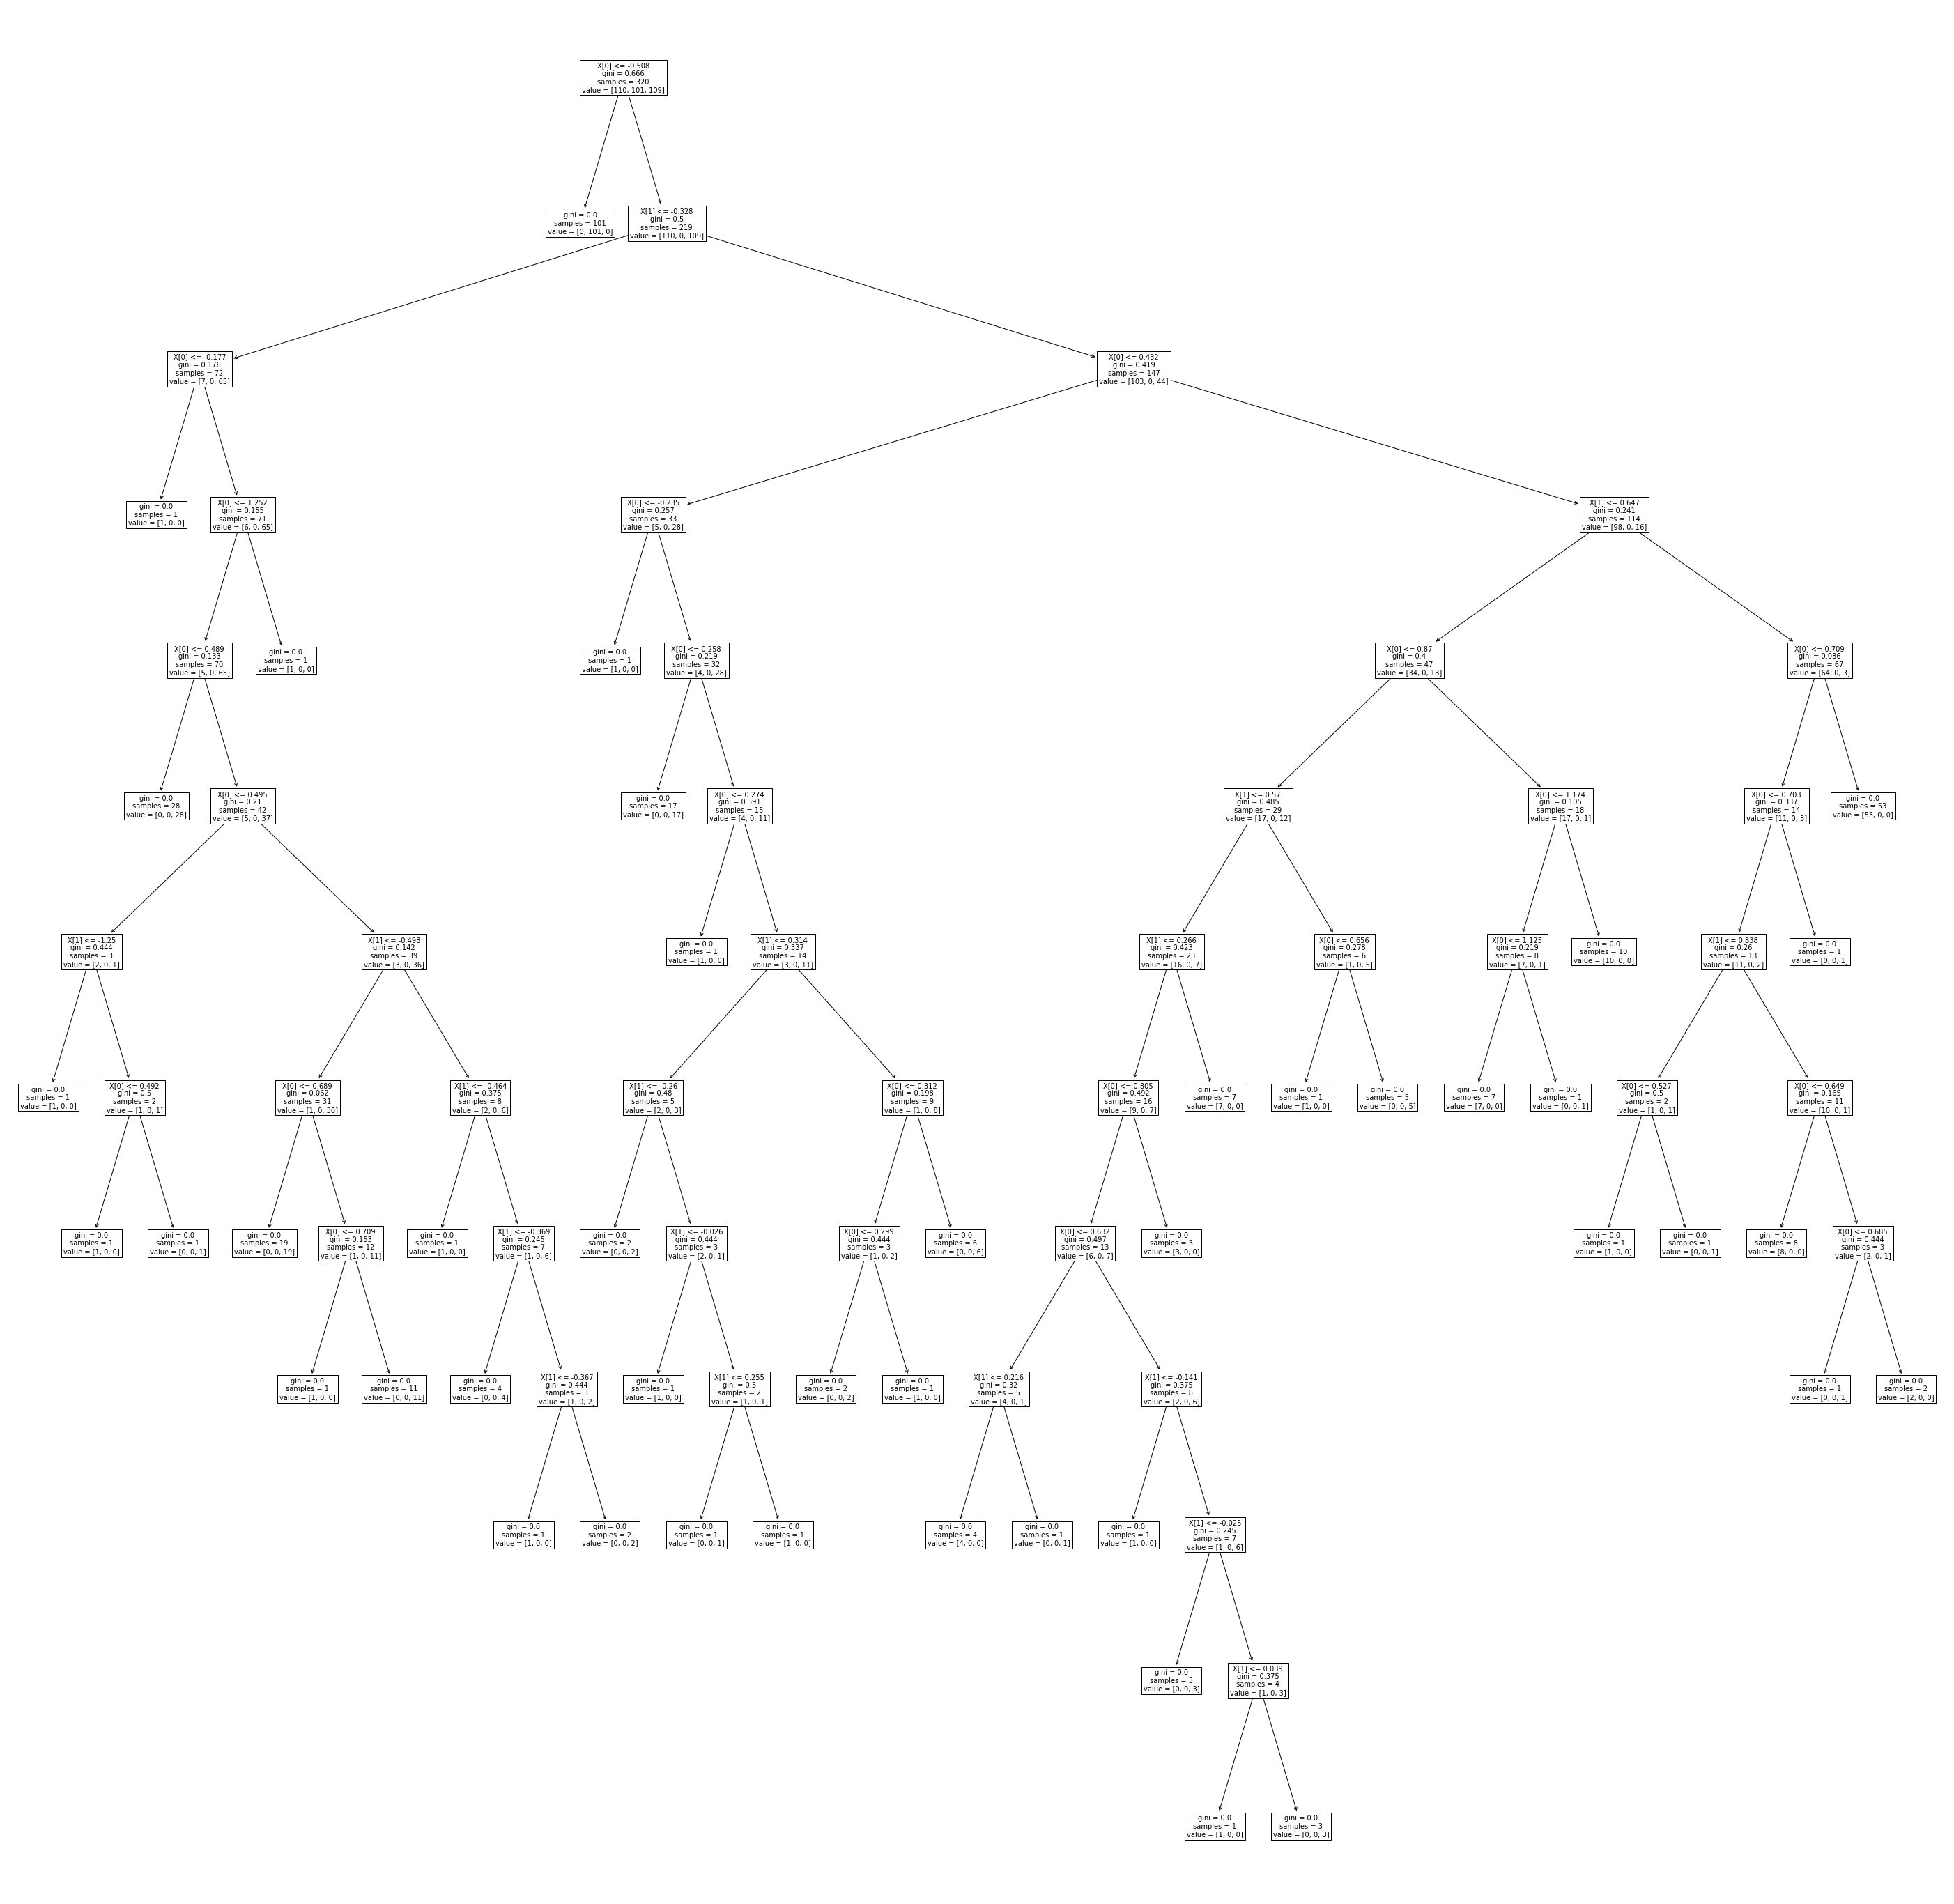

In [60]:
clf=DecisionTreeClassifier(max_depth=depth1)
clf.fit(X_train,y_train)
rcParams['figure.figsize']=50,50
print("Split during Overfitting..may take some time..")
plot_tree(clf)
plt.show()

Split during Underfitting..may take some time


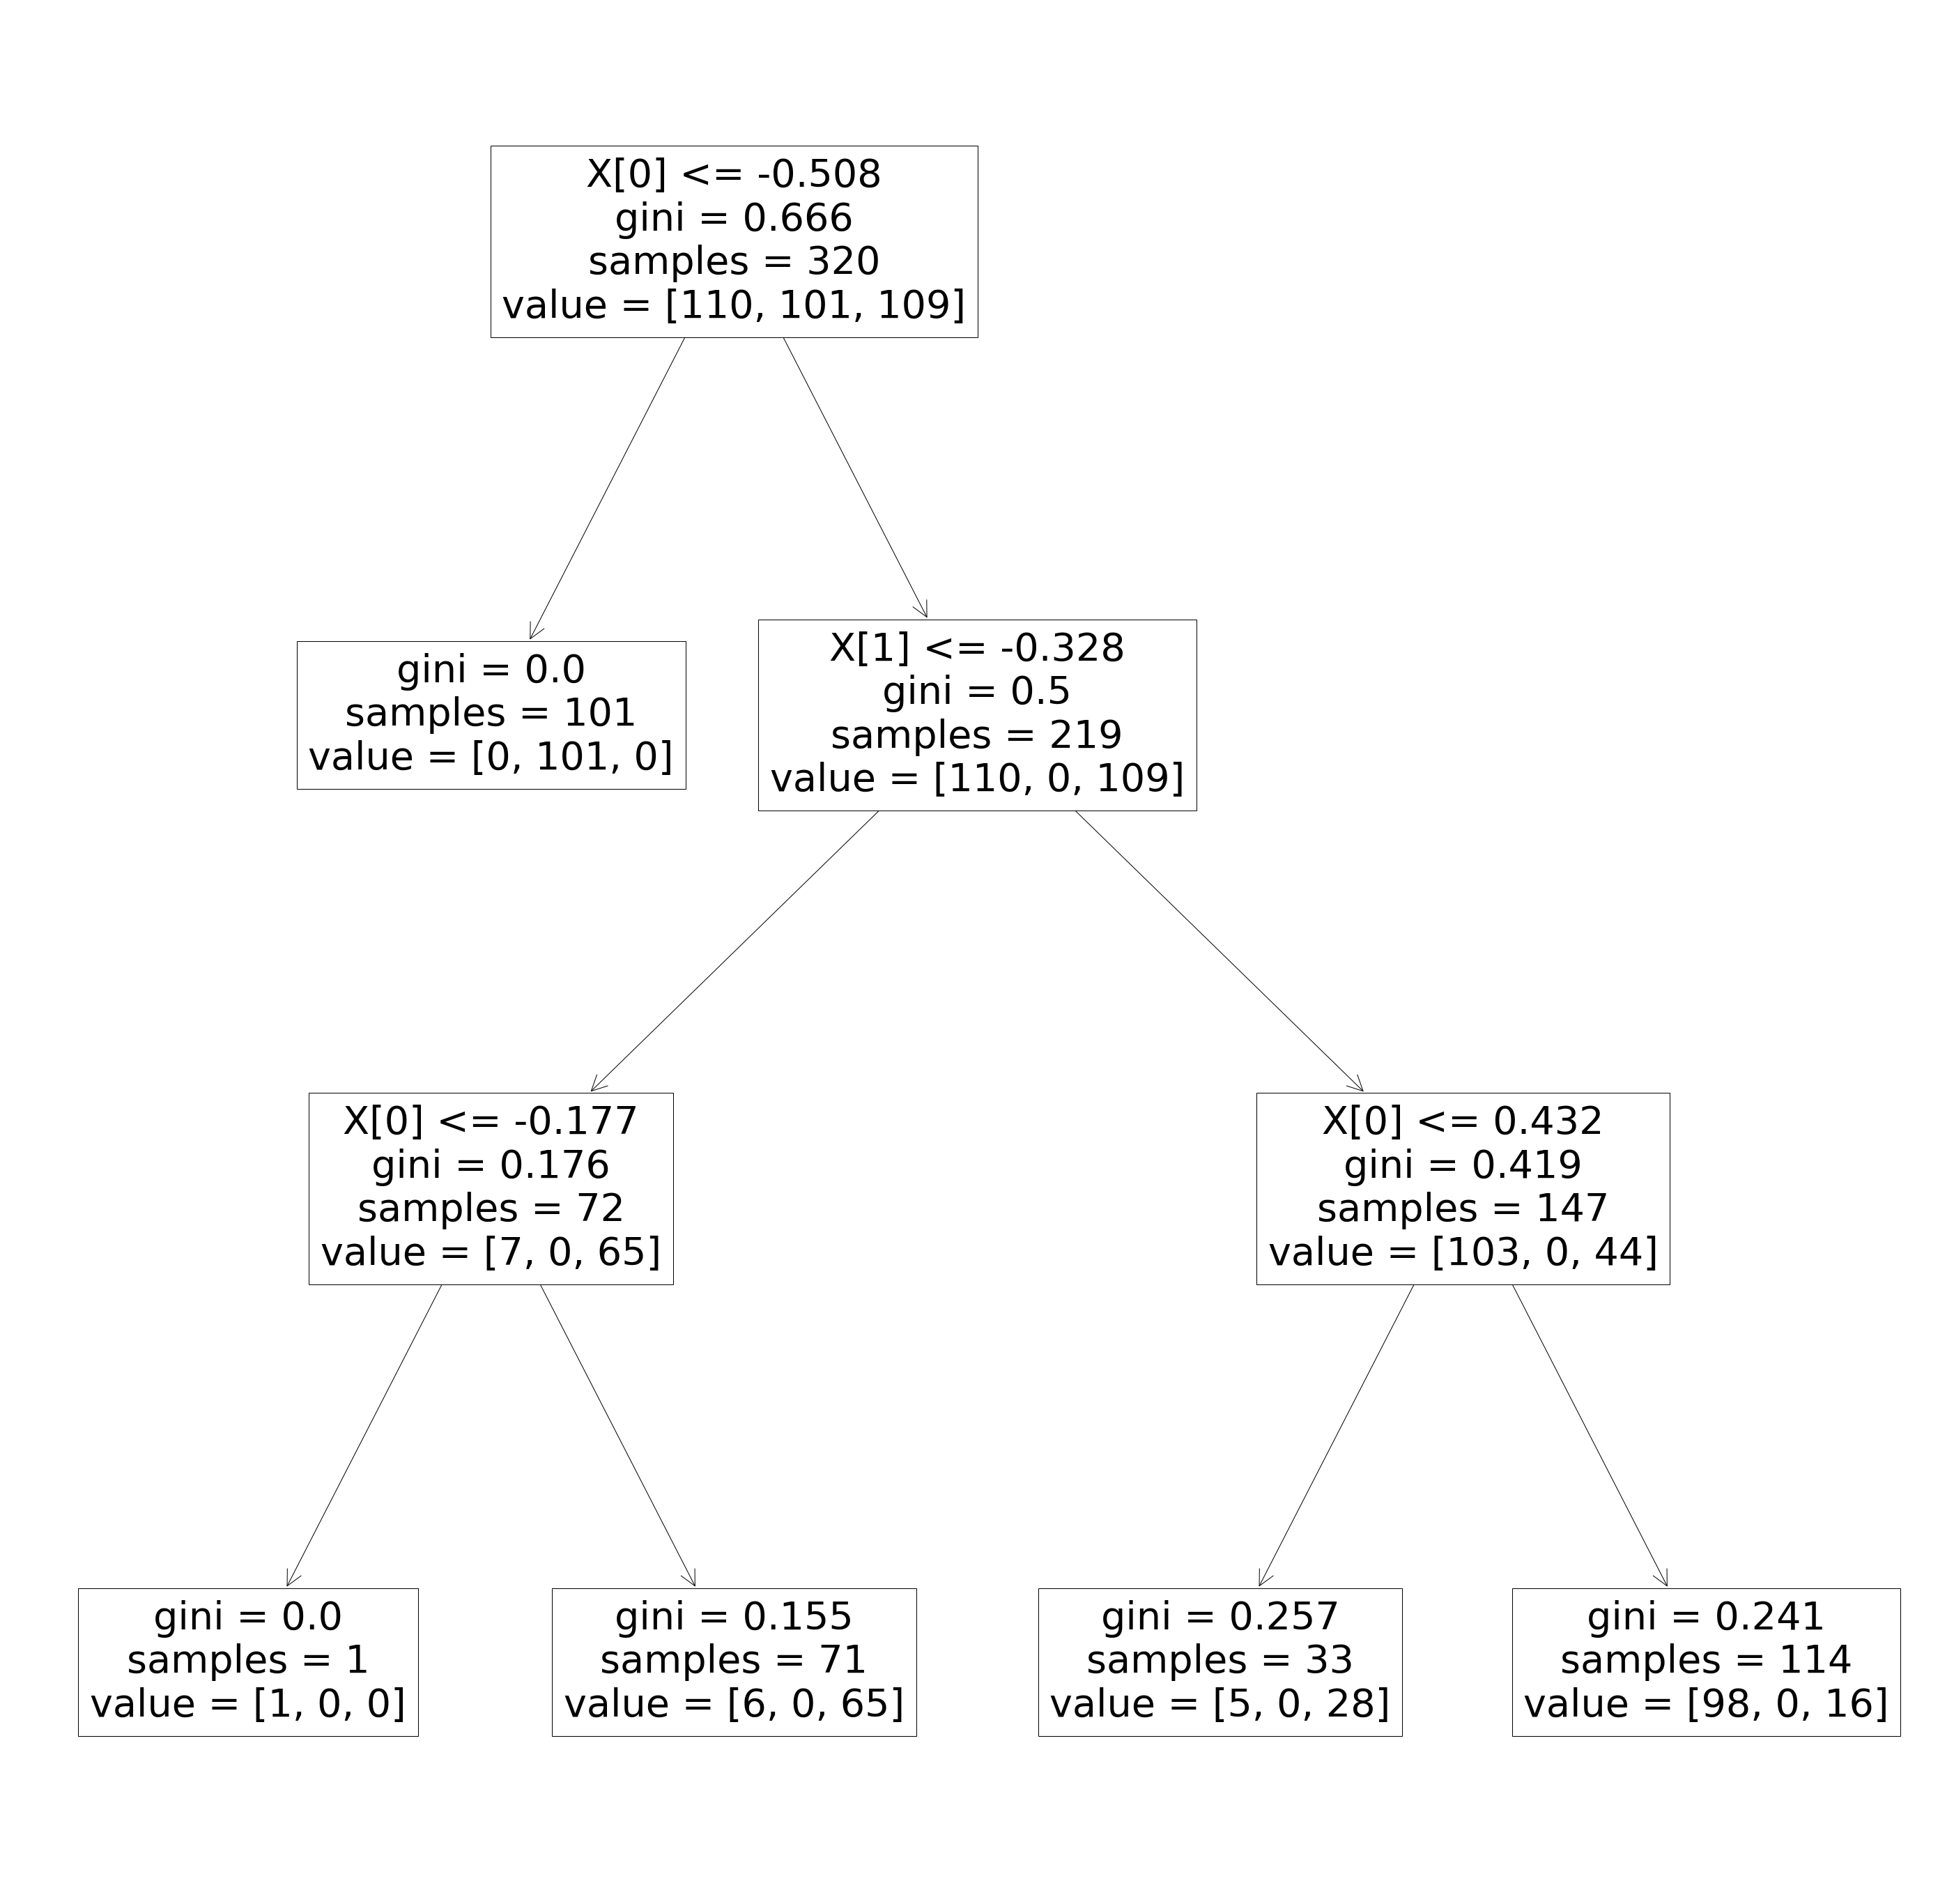

In [61]:
if(depth2!=0):
    clf=DecisionTreeClassifier(max_depth=depth2)
    clf.fit(X_train,y_train)
    rcParams['figure.figsize']=50,50
    print("Split during Underfitting..may take some time")
    plot_tree(clf)
    plt.show()
else:
    print("No Underfitting")